In [1]:
import torch as T
import numpy as np
from matplotlib import pyplot as plt
from agent import load_model, Agent

%matplotlib inline

In [24]:
def plot_weights_distributions(names, plot_name=None):
    models = [load_model(name) for name in names]
    
    model_count = len(models)
    
    layer_keys = list(filter(lambda key: key.startswith('net.') and key.endswith('.weight'), list(models[0]['model_state_dict'].keys())))
    layer_count = len(layer_keys)
    
    fig, axs = plt.subplots(model_count, layer_count)
    fig.set_size_inches(18.5, 10.5)

    for i in range(layer_count):
        axs[0, i].set_title(f"Layer {i}")
        
    for i in range(model_count):
        axs[i,0].set_ylabel(names[i])
        

    for i in range(model_count):
        for k in range(layer_count):
            w = models[i]['model_state_dict'][f"net.{k * 2}.weight"].cpu().data.numpy().reshape(-1)

            axs[i, k].hist(w, bins=70, orientation='horizontal')

    _ = plt.plot()
    
    if plot_name is not None:
        for name in names:
            plt.savefig(f"./agent_saves/{name}/{plot_name}")

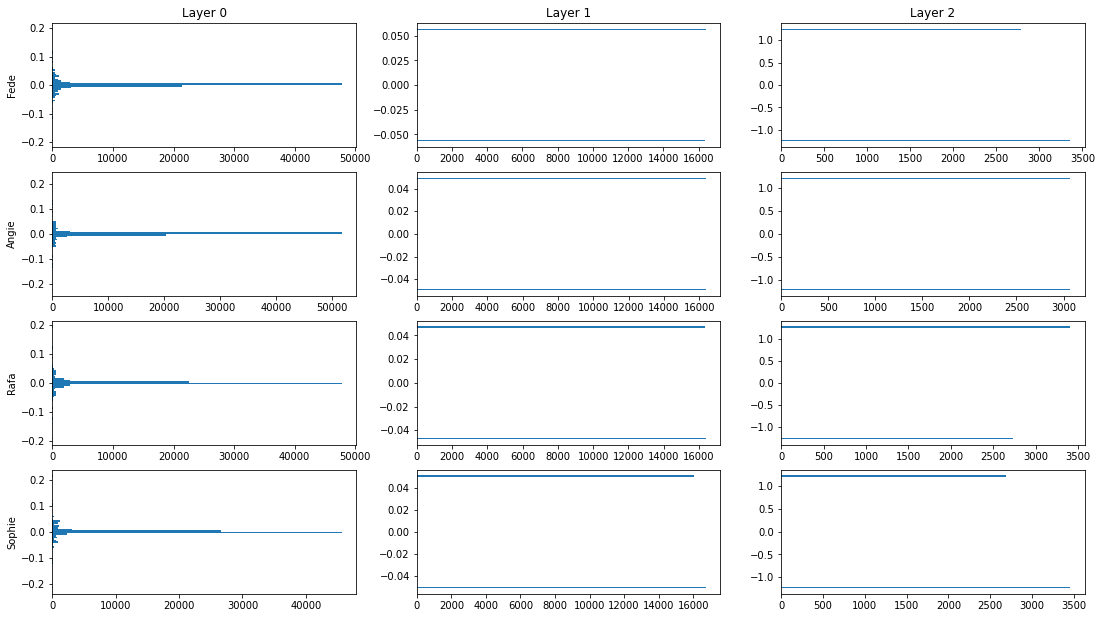

In [25]:
names = ['Fede', 'Angie', 'Rafa', 'Sophie']

plot_weights_distributions(names, plot_name="3.3M-steps.jpg")

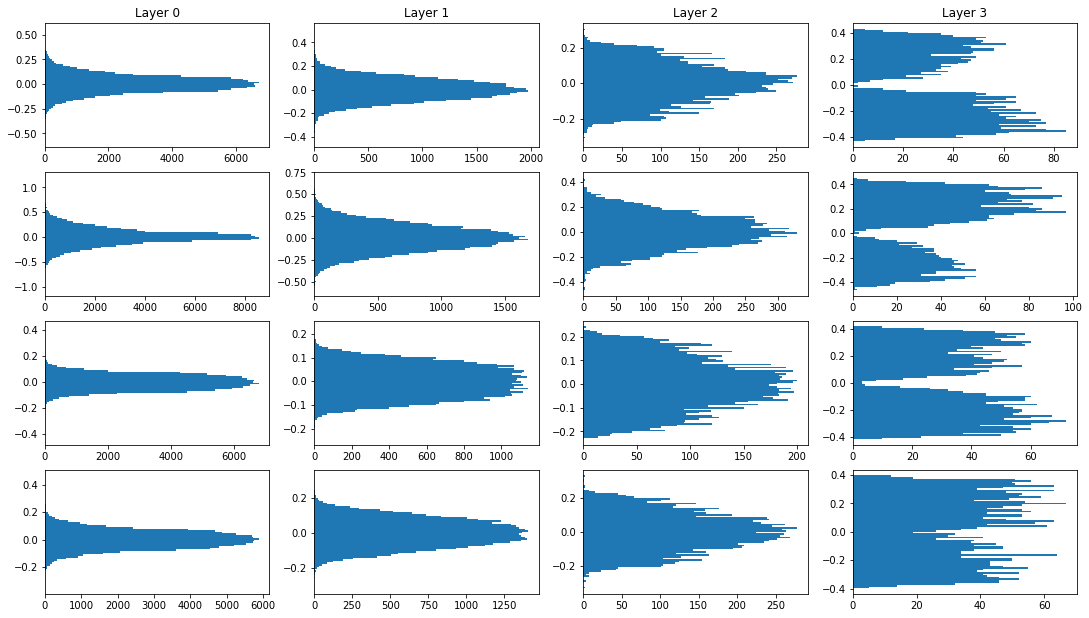

In [9]:
names = ['Coors', 'Bud', 'Patagonia', 'Stella']

models = [load_model(name) for name in names]

plot_weights_distributions(models)

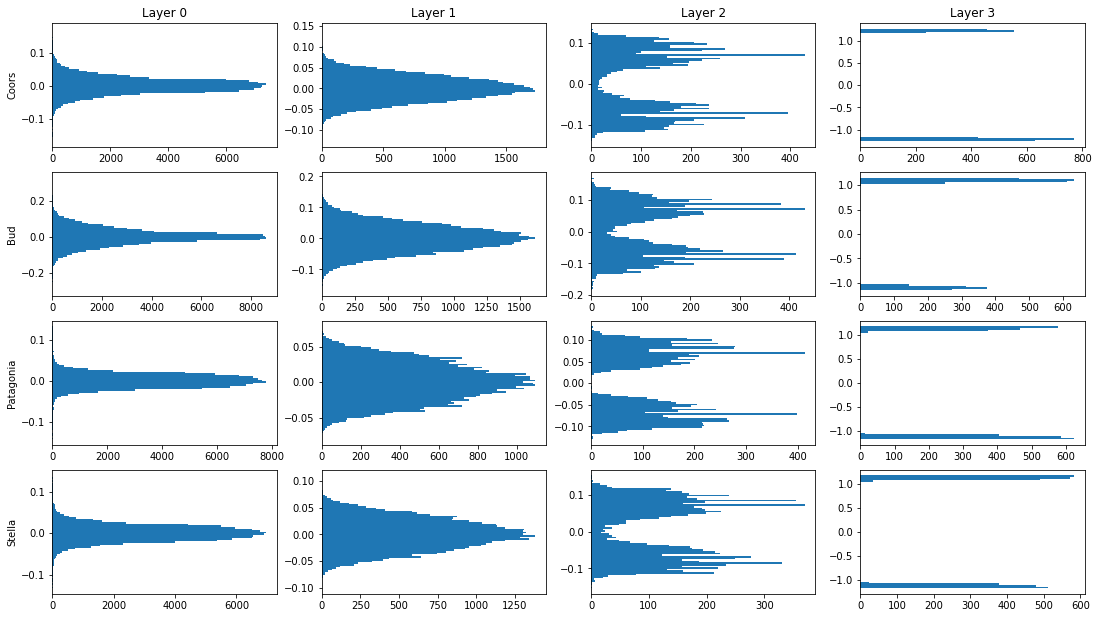

In [26]:
names = ['Coors', 'Bud', 'Patagonia', 'Stella']

plot_weights_distributions(names, plot_name="3.3M-steps.jpg")